___
# Capítulo 3 - Matemática e Estatística Básicas
## Seção 11 - Usando Spearman e Qui-Quadrado
___

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 6, 3
sns.set_style('whitegrid')

caminho = '../dados/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'qtd_marchas', 'carb']

In [2]:
from scipy.stats import spearmanr

### Correlação de Spearman

Lembre-se de escolher variáveis que seguem os pressupostos:

- Não apresentar distribuição normal
- Variáveis ordinais
- Variáveis não linearmente relacionadas

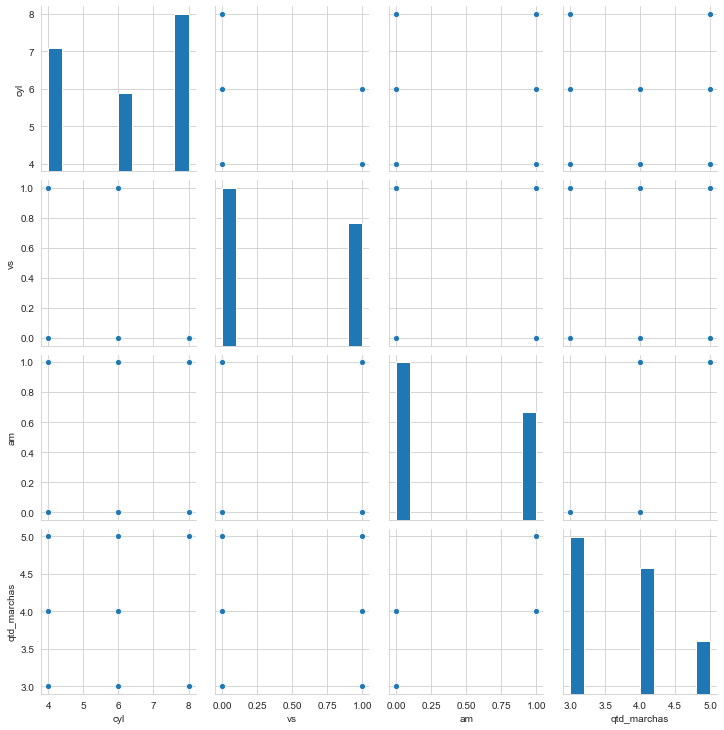

In [3]:
X = carros[['cyl', 'vs', 'am', 'qtd_marchas']]
sns.pairplot(X)

In [4]:
cyl = carros['cyl']
vs = carros['vs']
am = carros['am']
marchas = carros['qtd_marchas']

coeficiente_spearmanr, p_valor = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient {:0.3}'.format(coeficiente_spearmanr))

Spearman Rank Correlation Coefficient -0.814


podemos dizer que as variveis cyl (quantidade de cilindros) e vs (que a formato do motor) forte correlacao as outras duas tem uma correlacao apenas moderada

In [5]:
coeficiente_spearmanr, p_valor = spearmanr(cyl, am)
print('Spearman Rank Correlation Coefficient {:0.3}'.format(coeficiente_spearmanr))

Spearman Rank Correlation Coefficient -0.522


In [5]:
coeficiente_spearmanr, p_valor = spearmanr(cyl, marchas)
print('Spearman Rank Correlation Coefficient {:0.3}'.format(coeficiente_spearmanr))

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

para calcular o chi 2 primeiro precisamos montar um crosstab (que ja conhecemos de aulas anteriories)

In [11]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic {:0.3} p_value {:0.3}'.format(chi2, p))

Chi-square Statistic 8.74 p_value 0.0126


In [12]:
table # cria o que os estatísticos chamam de tabela de contingencia.

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


In [7]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic {:0.3} p_value {:0.1}'.format(chi2, p))

Chi-square Statistic 21.3 p_value 2e-05


In [8]:
table = pd.crosstab(cyl, marchas)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic {:0.3} p_value {:0.1}'.format(chi2, p))

Chi-square Statistic 18.0 p_value 0.001
